<a href="https://colab.research.google.com/github/gabrieladamasceno/AM_Desafio3/blob/main/Desafio_03_Equipamento_defeituoso_Maria_Gabriela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio 03 - Equipamento defeituoso**

Disciplina: Aprendizagem de Máquina

Professor: Cleber Zanchettin

Aluna: Maria Gabriela Lima Damasceno

## Introdução
A planilha em anexo possui informações sobre um conjunto de registros de sensores de equipamentos. Dentre eles, um equipamento está apresentando algum tipo de defeito em relação as bandas em que foram realizadas medições. As formas utilizadas para encontrar qual o objeto defeituoso no dataset são o cálculo da distância euclidiana e o algortimo K-Means.

Inicialmente foram importadas as bibliotecas utilizadas para desenvolver os projetos:

*   sklearn: possui diversas funções para algoritmos de aprendizagem de máquina;
*   scipy.spatial: fornece funcionalidades para operações espaciais e algoritmos;
*   matplotlib: promove visualização de dados em Python através de gráficos, dashboards e imagens;
*   pandas: usada para manipulação e análise de dados;
*   numpy: utilizada para computação científica e funções matemáticas.




In [196]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Tratamento de Dados

Através da biblioteca pandas a planilha no excel que continha o dataset foi transformada em um Data Frame.

O dataset pode ser plotado através da biblioteca do matplotlib onde foi possível analisar a distribuição dos dados.

Vizualmente já é possível observar que o objeto 2 tem um comportamento diferente em relação aos demais.

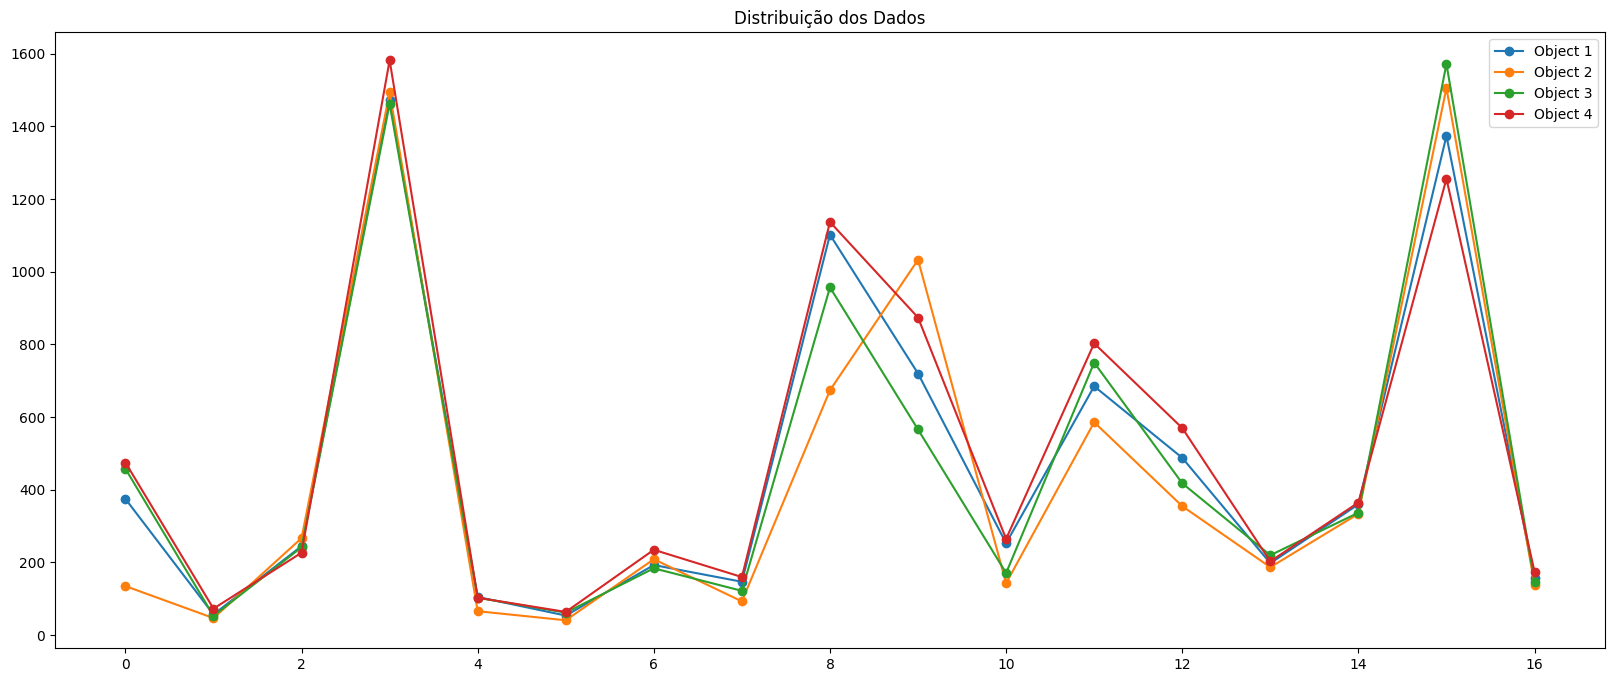

In [197]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/Failing_Equipment_Exercise.xlsx')
X1 = data.drop(columns=['Unnamed: 0'])
X1.plot(figsize=(20, 8), marker='o')
plt.title("Distribuição dos Dados")
plt.show()

O dataset foi transposto utilizando a função de matriz transposta do numpy para ficar no formato padrão onde nas linhas estão presentes as classes e nas colunas as features, também chamadas de características, que seriam as bandas em que cada objeto foi testado.

In [198]:
X2 = X1.T
print("Dataset")
X2

Dataset


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Object 1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Object 2,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Object 3,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Object 4,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


Para melhor utilização dos algoritmos de classificação o dataset foi normalizado através da função StandardScaler() que utiliza normalização Z-score, que atua subtraindo-se a média do atributo e dividindo pelo desvio padrão.



In [199]:
scaler = StandardScaler()
X = scaler.fit_transform(X2)
print("Dataset normalizado")
print(X)

Dataset normalizado
[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]]


# Resultados

## Distância Euclidiana



Por ser tratar de um dataset númerico é possível encontrar o outline, ou seja, um objeto que está diferente em relação aos demais, através do uso da distância euclidiana.

A distância euclidiana é a medida direta do "caminho mais curto" entre dois pontos ao traçar uma reta. Também é bastante utilizada em algoritmos de clustering, como o k-means, pois através dela pode-se avaliar a similaridade entre instâncias ou pontos de dados.

No código abaixo é procurado na lista de distâncias armazenadas qual a maior distância entre os objetos através da função np.argmax() do numpy, com isso é possível determinar qual é o objeto diferente e exibir a sua distância.

In [200]:
# Calculo da distância euclidiana media entre os clusters
distances_to_others = []
for i in range(len(X)):
    distances = []
    for j in range(len(X)):
        if i != j:
            dist = distance.euclidean(X[i], X[j])
            distances.append(dist)
    avg_dist = np.mean(distances)
    distances_to_others.append(avg_dist)

# Encontrando o objeto mais diferente
most_different_object_index = np.argmax(distances_to_others)
most_different_object = X[most_different_object_index]

#Exibindo o objeto mais diferente e os seus valores
print("O objeto mais diferente é:")
print("Objeto", (most_different_object_index+1))
print(most_different_object)
print('Distância euclidiana', max(distances_to_others))

O objeto mais diferente é:
Objeto 2
[-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
  0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
 -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]
Distância euclidiana 7.658307401417105


Com o cálculo da distância euclidiana foi dito que o objeto mais diferente é o Objeto 2, para confirmar essa informação vai ser utilizado o algoritmo do K-means.

## Clusterização com K-means

O K-Means é um algortimo de aprendizagem de máquina não supervisionado que particiona um conjunto de dados em k clusters, onde cada ponto de dados pertence a um cluster com o centróide mais próximo. A seleção dos clusters inicialmente é aleatória com um centróide para cada cluster. Cada ponto de dados é atribuído ao cluster cujo centróide é o mais próximo.

Neste projeto o número de clusters era 4 para poder encontrar o objeto defeituoso. Através da função Kmeans.fit() pode ser encontrado as labels de cada cluster e os valores dos seus centróides.

In [201]:
# N° de clusters = objetos
num_clusters = 4

# Treinando K-Means
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Labels
cluster_labels = kmeans.labels_

# Centróides
cluster_centers = kmeans.cluster_centers_

# Imprimindo os Centróides
print("Clusters")
print(cluster_labels)
print("Centróides dos Objetos")
print(cluster_centers)

Clusters
[0 1 3 2]
Centróides dos Objetos
[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]]


De posse dos valores das labels e dos centróides é possível plotar um gráfico de dispersão. No gráfico abaixo é possível observar que o centróide correspondente ao Objeto 2 é mais distante dos demais, indicando que realmente ele é o elemento defeituoso.

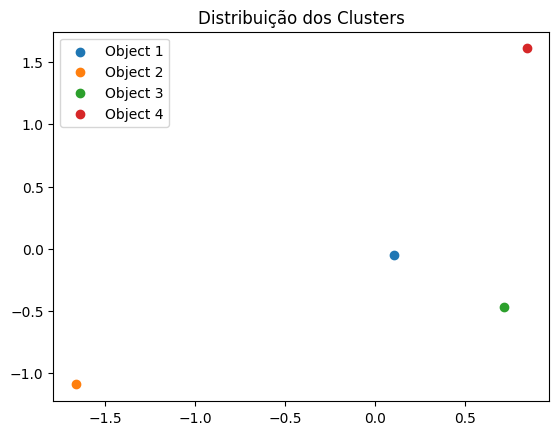

In [202]:
#Plotando o gráfico da distribuição dos centróides
for cluster in range(num_clusters):
    plt.scatter(cluster_centers[cluster_labels == cluster, 0], cluster_centers[cluster_labels == cluster, 1], label=f'Object {cluster + 1}')

plt.title('Distribuição dos Clusters')
plt.legend()
plt.show()

Nos histogramas feitos para os centróides de cada objeto é notório que o Objeto 2 tem mais valores negativos que os demais.

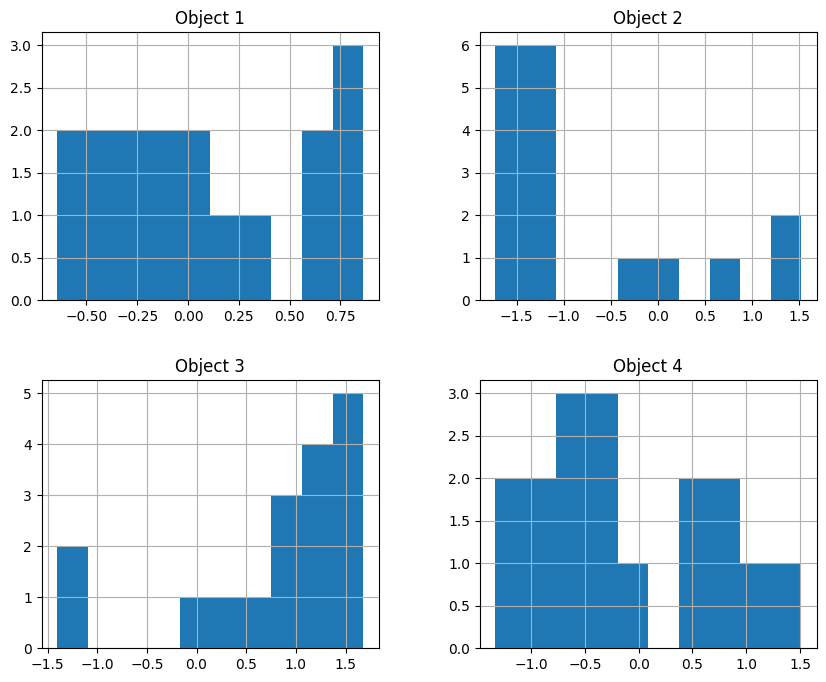

In [203]:
#Distribuição dos centróides através do gráfico de histograma
df = pd.DataFrame(cluster_centers.T)
nomes = {0: 'Object 1', 1: 'Object 2', 2: 'Object 3', 3: 'Object 4'}
df.columns = df.columns.map(nomes)
df.hist(bins=10, figsize=(10, 8))
plt.show()


No gráfico de Distribuição dos centróides ao longo de cada feature é também observado que o Objeto 2 tem mais features em valores negativos que os outros.

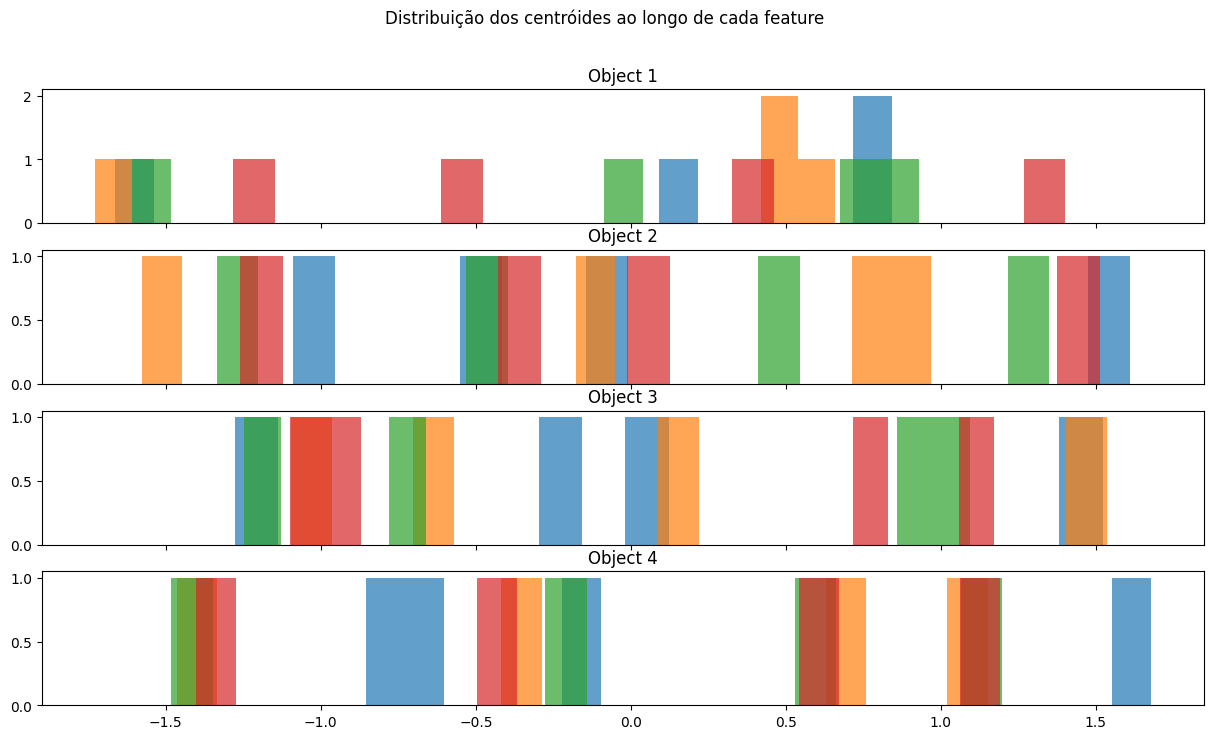

In [204]:
#Distribuição dos centróides ao longo de cada feature
data = cluster_centers
fig, axs = plt.subplots(4, 1, figsize=(15, 8), sharex=True)

for i in range(4):
    for j in range(4):
        axs[i].hist(data[:, i + 4*j], bins=20, alpha=0.7)
        axs[i].set_title(f'Object {i+1}')

plt.suptitle('Distribuição dos centróides ao longo de cada feature')
plt.show()

# Conclusão

Com isso, através dos gráficos expostos e das análises em relação a distância euclidiana e o algoritmo não supervisionado K-means é possível afirmar que o equipamento defeituoso no dataset proposto é o correspondente ao Objeto 2.